### Problem Statement

Build a K-NN  Regression Algorithm for cars.csv dataset 

Predictors : Cylinders , Weight and Horsepower

Target : MPG


#### Import Libraries

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.simplefilter("ignore")

#### Import Dataset

In [138]:
os.chdir(r'C:/Anirudha/Projects/Praxis/IML/')
dataset = pd.read_csv("cars.csv")
x_cols = ["Cylinders","Weight","Horsepower"]
y_cols = ["MPG"]
columns = x_cols + y_cols
dataset = dataset[columns]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
Cylinders     406 non-null int64
Weight        406 non-null int64
Horsepower    406 non-null int64
MPG           406 non-null float64
dtypes: float64(1), int64(3)
memory usage: 12.8 KB


### kNN Regression Algorithm ( Self-Built )

#### Drop Missing/Zero Values

In [139]:
data1 = dataset.copy()
data1.isnull().sum()

Cylinders     0
Weight        0
Horsepower    0
MPG           0
dtype: int64

In [140]:
zero_indices = []
for i in range(len(columns)):
    zero_indices.extend(data1.index[data1[columns[i]] == 0].to_list())    
data1.iloc[zero_indices,:]

,Cylinders,Weight,Horsepower,MPG
38,4,2046,0,25.0
133,6,2875,0,21.0
337,4,1835,0,40.9
343,4,2905,0,23.6
361,4,2320,0,34.5
382,4,3035,0,23.0
10,4,3090,115,0.0
11,8,4142,165,0.0
12,8,4034,153,0.0
13,8,4166,175,0.0


In [141]:
data1.drop(zero_indices,inplace=True)
print("Dropped %d rows as it contained Null/Zero Values"% len(zero_indices))
print("Length of Dataset :",len(data1))

Dropped 14 rows as it contained Null/Zero Values
Length of Dataset : 392


#### Standardization of all X columns

In [152]:
for i in range(len(x_cols)):
    mean = data1[x_cols[i]].mean()
    stdDev = data1[x_cols[i]].std()
    
    ## Using Lamda Functions to apply the standardization on predictor Columns
    data1[x_cols[i]] = data1[x_cols[i]].apply(lambda x : (x - mean)/stdDev) 
data1 = data1.sort_values(y_cols) 

#### Splitting Test and Train

In [220]:
def mySplit(data):
    length = len(data)
    # Generate Random Index to be chosen as Test dataset
    rand_index = np.random.randint(length) 
    #rand_index = 148 ---- Use it to check for a specific index
    testX = data.loc[rand_index,x_cols]
    testY = data.loc[rand_index,y_cols]
    trainX = data.drop(rand_index,inplace=False)[x_cols]
    trainY = data.drop(rand_index,inplace= False)[y_cols]    
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = mySplit(data1)

#### Algorithm Design

In [221]:
def kNN_regression(trainX,trainY,testX,testY,k):
    distance = []
    vector2 = np.array(testX)
    
    # Use norm function to calculate the Euclidean Distance of Test Set with Training Set
    for i in range(len(trainX)):
        vector1 = np.array(trainX.iloc[i,:])
        distance.append(np.linalg.norm(vector1 - vector2))
    unsorted_dist = distance.copy()
    
    # Sort the distances in ascending order
    distance.sort()
    
    # Pick out the k nearest neighbours around Test dataset
    kNNIndex=[]
    for i in range(k):
        kNNIndex.append(unsorted_dist.index(distance[i]))
        unsorted_dist[kNNIndex[i]] = -1
    
    # Find the mean of the MPG values corresponding to the KNN 
    prediction = np.mean(trainY.loc[kNNIndex])
    
    # Calculate the Mean Squared Error of predicted and actual value
    error = round(mse(testY,prediction),2)
    return error

#### Performance Measure

Text(0.5, 1.0, 'MSE vs K')

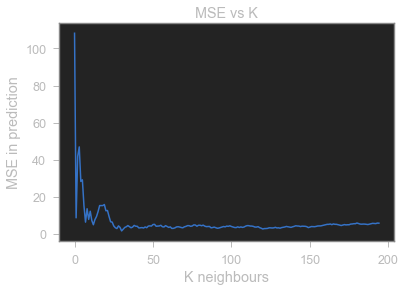

In [222]:
# Plot the MSE values for different values of K for the chosen test set

error = []
for i in range(1,int(len(data1)/2)):
    error.append(kNN_regression(trainX,trainY,testX,testY,i))    
    
plt.plot(error)
plt.xlabel("K neighbours")
plt.ylabel("MSE in prediction")
plt.title("MSE vs K")

Text(0.5, 1.0, 'MSE vs chosen Test Set value \\(for k=50\\)')

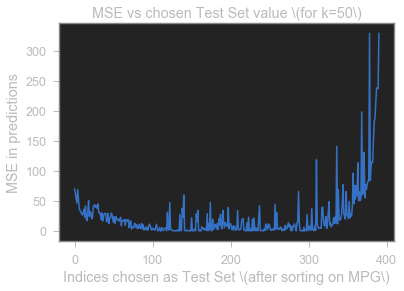

In [159]:
# Plot the Mean Squared Error across individual Train Set, keeping a fixed value of K
# For this Sort each training set by "MPG" value to make sense of the graph

error = []
for i in range(len(trainX)):
    testX = trainX.iloc[i,:]
    testY = trainY.iloc[i,:]
    error.append(kNN_regression(trainX,trainY,testX,testY,50))    
    
# From the graph the test set chosen close to mean MPG will have a lower MSE 
# compared to test set which are farther away from mean

plt.plot(error)
plt.xlabel("Indices chosen as Test Set")
plt.ylabel("MSE in predictions")
plt.title("MSE vs chosen Test Set value (for k=50)")

### kNN Regression Algorithm ( using Inbuilt Function )

#### Data Preprocessing

In [151]:
data2 = dataset.copy()
print("Total Number of Null Values:\n",data2.isna().sum())

Total Number of Null Values:
 Cylinders     0
Weight        0
Horsepower    0
MPG           0
dtype: int64


In [154]:
data2.drop(dataset.index[data2[columns].apply(lambda x : any(x == 0),axis=1)],
             inplace= True)
print("Length of Dataset after removing zero/nulls :", len(data2))

Length of Dataset after removing zero/nulls : 392


In [225]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
data2[x_cols] = standardize.fit_transform(data2[x_cols])
data2.head()

23.44591836734694

In [231]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(data2[x_cols],data2[y_cols],test_size=1/len(data2))
print("Test Set :\n" , Xtest)
print("\nActual MPG Value :", Ytest.iloc[0,0])

Test Set :
     Cylinders    Weight  Horsepower
27  -0.864014 -0.645494   -0.376395

Actual MPG Value : 24.0


#### Algorithm Design

In [232]:
from sklearn.neighbors import KNeighborsRegressor as kNN_regressor

error = []
for i in range(1, int(len(data2)/2)):
    kNN = kNN_regressor(n_neighbors= i)
    kNN.fit(Xtrain,Ytrain)
    prediction = kNN.predict(Xtest)
    error.append(round(mse(Ytest,prediction),2))

#### Performance Measure

Text(0.5, 1.0, 'MSE vs K')

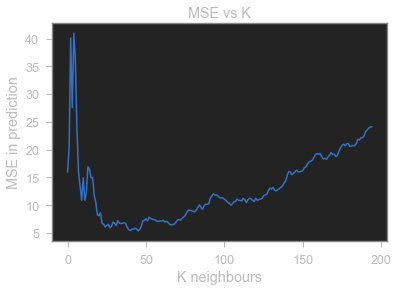

In [233]:
plt.plot(error)
plt.xlabel("K neighbours")
plt.ylabel("MSE in prediction")
plt.title("MSE vs K")